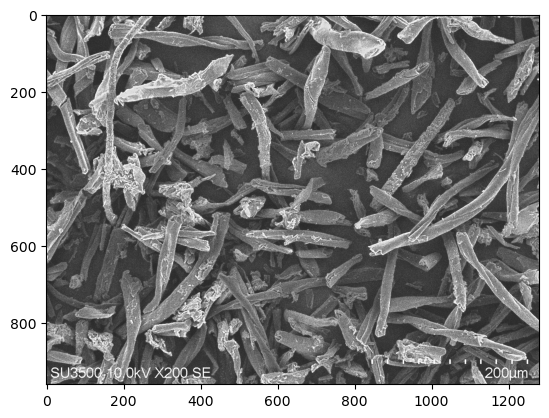

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import io, color
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

#LOADING AND READING IMAGE
im = io.imread("sem beda.jpg")
plt.imshow(im, cmap ='gray')

In [2]:
im.shape

(960, 1280, 3)

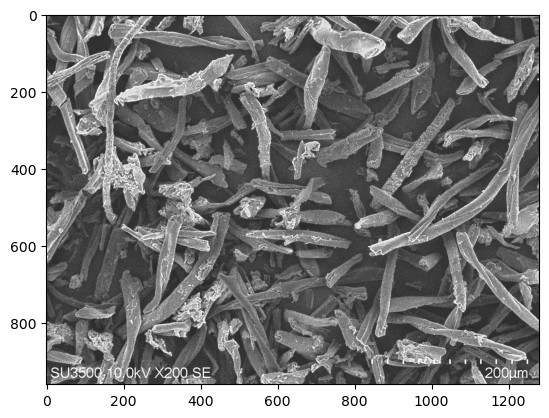

In [3]:
#Converting to grayscale
from skimage.color import rgb2gray
im1 = rgb2gray(im)
plt.imshow(im1, cmap='gray')

In [4]:
im1.shape

(960, 1280)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


<function matplotlib.pyplot.show(close=None, block=None)>

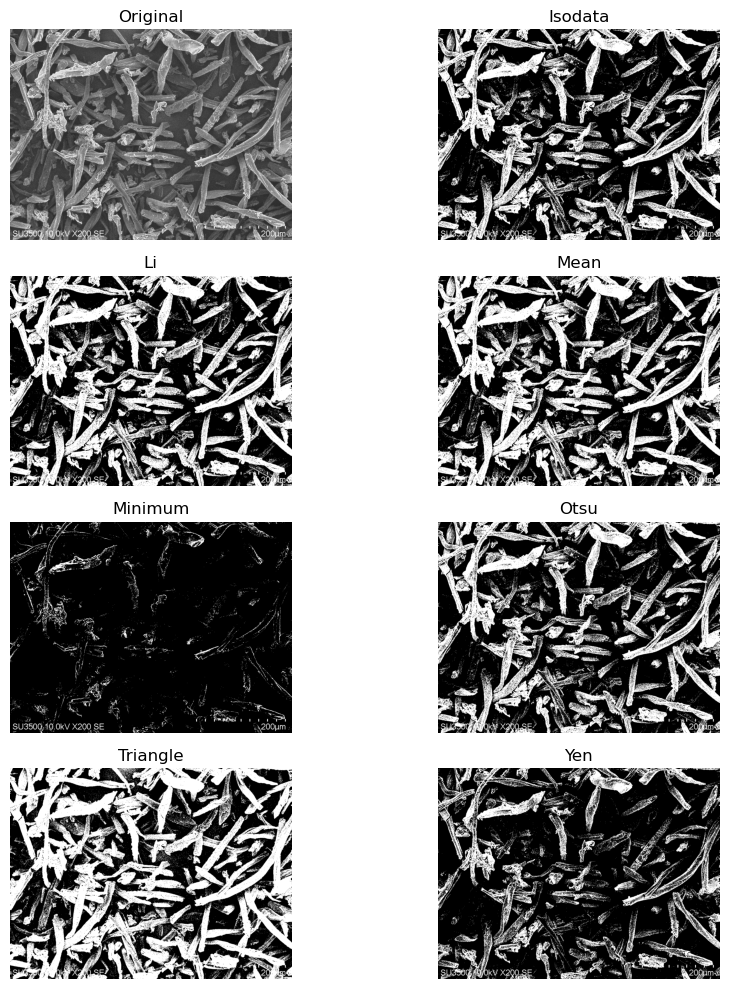

In [5]:
#Thresholding: to get the binary image
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(im1, figsize=(10, 10), verbose=True)
plt.show

In [6]:
from skimage.filters import threshold_mean
th = threshold_mean(im1)
print(th)

0.4063043236825979


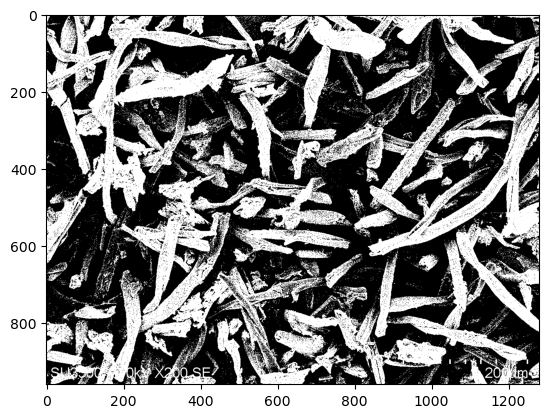

In [7]:
th_im = im1 > th
plt.imshow(th_im, cmap='gray')

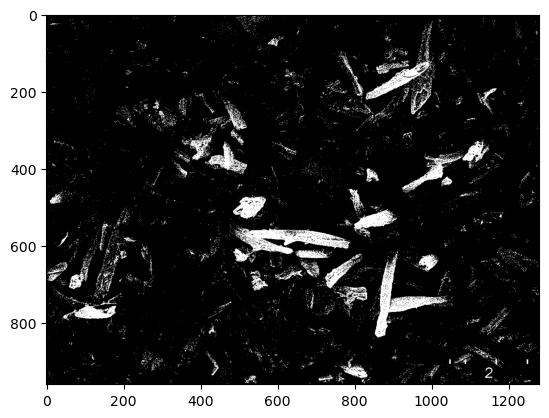

In [25]:
#PARTICLE MEASUREMNET

from skimage.segmentation import clear_border
im2= clear_border(th_im)
plt.imshow(im2, cmap='gray')

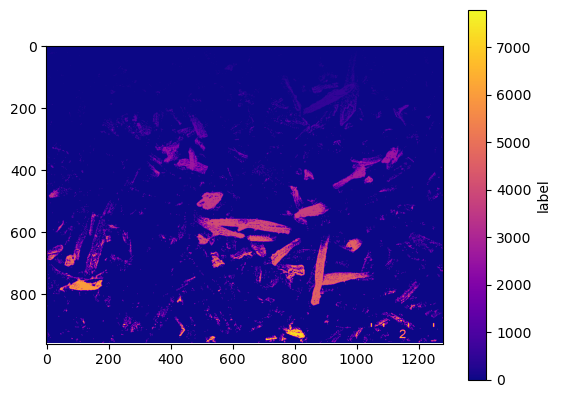

In [29]:
from skimage.measure import label
im_l = label(im2, connectivity=im2.ndim)
#cmap=plt.cm.get_cmap('plasma')
i_map =plt.imshow(im_l, cmap='plasma')
i_map_labeled=plt.colorbar(i_map).set_label('label')

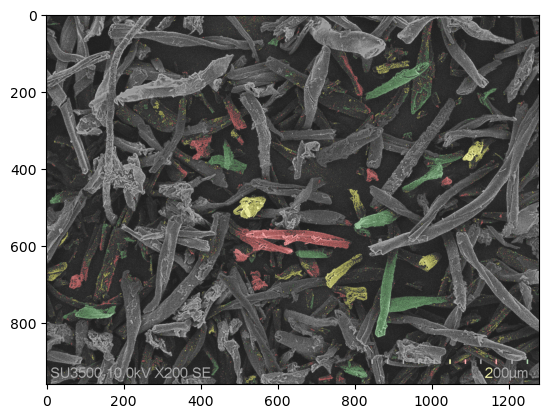

In [30]:
from skimage.color import label2rgb
# colors option is a list of 3 elements
im_ov_s = label2rgb(im_l, image=im1, colors= ['yellow','green', 'red'])
plt.imshow(im_ov_s)

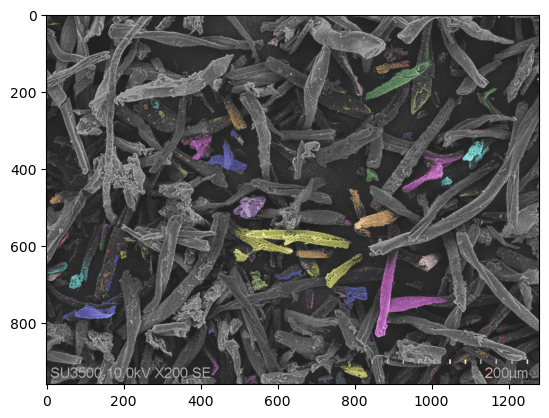

In [32]:
from skimage.color import label2rgb
import matplotlib as mpl
im_ov_s1 = label2rgb(im_l, image=im1)
plt.imsave("im_ov_s.jpg", im_ov_s1) 
plt.imshow(im_ov_s1)

In [35]:
from skimage.measure import regionprops, regionprops_table
scale = 4 #nm/pixel
props=regionprops(im_l, im1)
#for prop in all_props:
#print('Label: {} Area: {}'.format(prop.label, prop.area))


props_t = regionprops_table(im_l, im1, 
                          properties=['label','area', 'equivalent_diameter',
                                       'solidity'])

import pandas as pd
df = pd.DataFrame(props_t)
print(df)


      label  area  equivalent_diameter  solidity
0         1    10             3.568248  0.625000
1         2    10             3.568248  0.625000
2         3     4             2.256758  0.800000
3         4     1             1.128379  1.000000
4         5     1             1.128379  1.000000
...     ...   ...                  ...       ...
7785   7786     4             2.256758  0.666667
7786   7787     2             1.595769  1.000000
7787   7788     1             1.128379  1.000000
7788   7789     2             1.595769  1.000000
7789   7790     1             1.128379  1.000000

[7790 rows x 4 columns]


In [34]:
df['area_sqnm'] = df['area'] * (scale**2)
df['equivalent_diameter_nm'] = df['equivalent_diameter'] * (scale)
df

label  area  equivalent_diameter  solidity  area_sqnm  \
0         1    10             3.568248  0.625000        160   
1         2    10             3.568248  0.625000        160   
2         3     4             2.256758  0.800000         64   
3         4     1             1.128379  1.000000         16   
4         5     1             1.128379  1.000000         16   
...     ...   ...                  ...       ...        ...   
7785   7786     4             2.256758  0.666667         64   
7786   7787     2             1.595769  1.000000         32   
7787   7788     1             1.128379  1.000000         16   
7788   7789     2             1.595769  1.000000         32   
7789   7790     1             1.128379  1.000000         16   

      equivalent_diameter_nm  
0                  14.272993  
1                  14.272993  
2                   9.027033  
3                   4.513517  
4                   4.513517  
...                      ...  
7785                9.027033  
7786                6.383076  
7787                4.513517  
7788                6.383076  
7789                4.513517  

[7790 rows x 6 columns]

In [23]:
df = df[df['area'] > 100]

In [15]:
#Equivalent diameter = SqRoot{(4*Area)/pi}

df

label   area  equivalent_diameter  solidity  area_sqnm  \
418     419    240            17.480775  0.603015       3840   
544     545   4268            73.716934  0.513413      68288   
638     639    637            28.479003  0.313793      10192   
720     721    109            11.780624  0.475983       1744   
756     757    582            27.221782  0.438253       9312   
1159   1160    888            33.624942  0.368312      14208   
1264   1265    470            24.462677  0.351796       7520   
1527   1528    135            13.110581  0.564854       2160   
1676   1677    904            33.926517  0.479830      14464   
1842   1843    115            12.100518  0.583756       1840   
2451   2452    146            13.634257  0.510490       2336   
2513   2514   1375            41.841419  0.480098      22000   
2528   2529    139            13.303394  0.594017       2224   
2577   2578   1722            46.824337  0.605698      27552   
2611   2612   2567            57.169974  0.566667      41072   
2833   2834   2940            61.182712  0.404959      47040   
3029   3030    211            16.390654  0.491841       3376   
3104   3105    568            26.892379  0.661234       9088   
3287   3288    346            20.989066  0.740899       5536   
3456   3457    695            29.747294  0.585017      11120   
3526   3527    398            22.511094  0.638844       6368   
3585   3586   2893            60.691696  0.824217      46288   
3736   3737   3039            62.204300  0.656797      48624   
3985   3986    114            12.047793  0.561576       1824   
4052   4053  10222           114.083542  0.519358     163552   
4110   4111    144            13.540550  0.571429       2304   
4219   4220    132            12.964090  0.613953       2112   
4486   4487   1175            38.678889  0.704859      18800   
4522   4523    154            14.002817  0.555957       2464   
4632   4633   2057            51.176691  0.638027      32912   
4633   4634   8131           101.748271  0.376157     130096   
4668   4669   1135            38.014825  0.760214      18160   
4691   4692    117            12.205287  0.522321       1872   
4907   4908   1149            38.248559  0.541981      18384   
4938   4939    123            12.514330  0.460674       1968   
4947   4948    324            20.310825  0.417526       5184   
4952   4953    406            22.736210  0.472643       6496   
5241   5242    453            24.016193  0.347393       7248   
5249   5250    859            33.071329  0.539234      13744   
5291   5292    165            14.494293  0.368304       2640   
5298   5299    261            18.229523  0.625899       4176   
5661   5662   1279            40.354348  0.458259      20464   
5891   5892    147            13.680870  0.375000       2352   
5893   5894    106            11.617375  0.595506       1696   
6031   6032   2616            57.713037  0.576847      41856   
6561   6562    118            12.257335  0.493724       1888   
6966   6967    115            12.100518  0.409253       1840   
7116   7117    105            11.562446  0.462555       1680   
7273   7274    190            15.553633  0.386965       3040   
7282   7283   1173            38.645957  0.646994      18768   
7470   7471    186            15.389040  0.390756       2976   
7595   7596    201            15.997536  0.478571       3216   
7605   7606    153            13.957279  0.550360       2448   

      equivalent_diameter_nm  
418                69.923100  
544               294.867737  
638               113.916010  
720                47.122497  
756               108.887128  
1159              134.499767  
1264               97.850710  
1527               52.442325  
1676              135.706068  
1842               48.402074  
2451               54.537029  
2513              167.365677  
2528               53.213577  
2577              187.297346  
2611              228.679895  
2833              244.730848  
3029               65.

In [16]:
df_final = df.reindex(columns =['label', 'area_sqnm', 'equivalent_diameter_nm', 'solidity'])
df_final

label  area_sqnm  equivalent_diameter_nm  solidity
418     419       3840               69.923100  0.603015
544     545      68288              294.867737  0.513413
638     639      10192              113.916010  0.313793
720     721       1744               47.122497  0.475983
756     757       9312              108.887128  0.438253
1159   1160      14208              134.499767  0.368312
1264   1265       7520               97.850710  0.351796
1527   1528       2160               52.442325  0.564854
1676   1677      14464              135.706068  0.479830
1842   1843       1840               48.402074  0.583756
2451   2452       2336               54.537029  0.510490
2513   2514      22000              167.365677  0.480098
2528   2529       2224               53.213577  0.594017
2577   2578      27552              187.297346  0.605698
2611   2612      41072              228.679895  0.566667
2833   2834      47040              244.730848  0.404959
3029   3030       3376               65.562617  0.491841
3104   3105       9088              107.569517  0.661234
3287   3288       5536               83.956263  0.740899
3456   3457      11120              118.989175  0.585017
3526   3527       6368               90.044375  0.638844
3585   3586      46288              242.766785  0.824217
3736   3737      48624              248.817201  0.656797
3985   3986       1824               48.191171  0.561576
4052   4053     163552              456.334169  0.519358
4110   4111       2304               54.162200  0.571429
4219   4220       2112               51.856359  0.613953
4486   4487      18800              154.715557  0.704859
4522   4523       2464               56.011269  0.555957
4632   4633      32912              204.706766  0.638027
4633   4634     130096              406.993086  0.376157
4668   4669      18160              152.059298  0.760214
4691   4692       1872               48.821147  0.522321
4907   4908      18384              152.994235  0.541981
4938   4939       1968               50.057321  0.460674
4947   4948       5184               81.243300  0.417526
4952   4953       6496               90.944841  0.472643
5241   5242       7248               96.064771  0.347393
5249   5250      13744              132.285314  0.539234
5291   5292       2640               57.977171  0.368304
5298   5299       4176               72.918093  0.625899
5661   5662      20464              161.417391  0.458259
5891   5892       2352               54.723481  0.375000
5893   5894       1696               46.469498  0.595506
6031   6032      41856              230.852148  0.576847
6561   6562       1888               49.029341  0.493724
6966   6967       1840               48.402074  0.409253
7116   7117       1680               46.249783  0.462555
7273   7274       3040               62.214534  0.386965
7282   7283      18768              154.583828  0.646994
7470   7471       2976               61.556160  0.390756
7595   7596       3216               63.990143  0.478571
7605   7606       2448               55.829118  0.550360

In [17]:
df_final.to_csv('measure_simulated.csv')

In [18]:
import plotly.express as px
fig = px.scatter(df_final, x="label", y="equivalent_diameter_nm", color="label")
                
fig.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='equivalent_diameter_nm', ylabel='Density'>

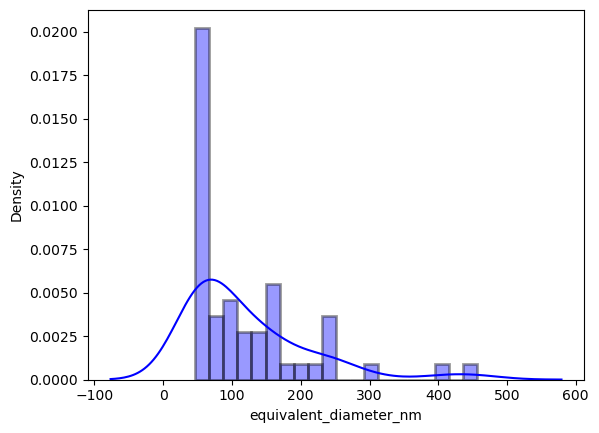

In [19]:
#Kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.
#Density: normalize such that the total area of the histogram equals 1

import seaborn as sns
from matplotlib import pyplot as plt
sns.distplot(df_final['equivalent_diameter_nm'], color='b', bins = 20, kde = True, norm_hist=True, hist_kws = dict(edgecolor = 'k', linewidth = 2))

<AxesSubplot:xlabel='equivalent_diameter_nm', ylabel='Count'>

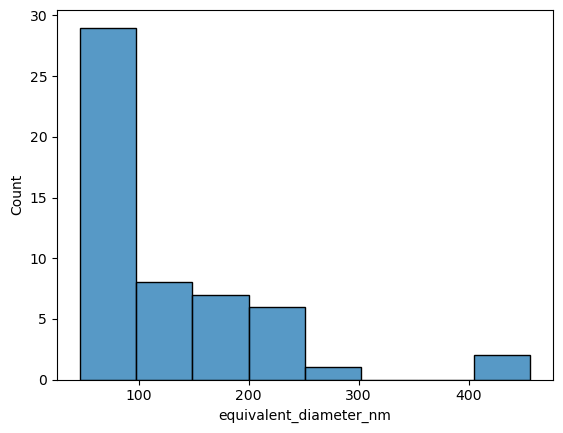

In [36]:
sns.histplot(data=df_final['equivalent_diameter_nm'] )